In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('data_label.csv', index_col=[0], on_bad_lines='skip')

In [20]:
# df.columns =['location', 'time', 'tweet']
df.head()

,location,time,tweet,sentiment
0,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
1,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
2,NaN,16-03-2020,My food stock is not the only one which is emp...,Neutral
3,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Positive
4,"ÃœT: 36.319708,-82.363649",16-03-2020,As news of the regionÂ’s first confirmed COVID...,Positive


In [21]:
df = df.astype({'tweet':'string'})

In [22]:
df = df.dropna(subset=['tweet'])

In [23]:
df

,location,time,tweet,sentiment
0,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
1,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
2,NaN,16-03-2020,My food stock is not the only one which is emp...,Neutral
3,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Positive
4,"ÃœT: 36.319708,-82.363649",16-03-2020,As news of the regionÂ’s first confirmed COVID...,Positive
...,...,...,...,...
573567,NaN,20-10-2020,governor use feder tax money earmark covid19 r...,Positive
573568,NaN,20-10-2020,sinc covid19 lockdown began countri april nige...,Negative
573569,"Virginia, USA",20-10-2020,began warn januari earli march hammer trump to...,Negative
573570,"Nederland""",20-10-2020,worker countri sign petit reinstat worker mass...,Negative


In [24]:
df['Negative'] = df['sentiment'].apply(lambda x: 1 if x == "Negative" else 0)
df['Neutral'] = df['sentiment'].apply(lambda x: 1 if x == "Neutral" else 0)
df['Positive'] = df['sentiment'].apply(lambda x: 1 if x == "Positive" else 0)
df

,location,time,tweet,sentiment,Negative,Neutral,Positive
0,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0,0,1
1,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0,0,1
2,NaN,16-03-2020,My food stock is not the only one which is emp...,Neutral,0,1,0
3,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Positive,0,0,1
4,"ÃœT: 36.319708,-82.363649",16-03-2020,As news of the regionÂ’s first confirmed COVID...,Positive,0,0,1
...,...,...,...,...,...,...,...
573567,NaN,20-10-2020,governor use feder tax money earmark covid19 r...,Positive,0,0,1
573568,NaN,20-10-2020,sinc covid19 lockdown began countri april nige...,Negative,1,0,0
573569,"Virginia, USA",20-10-2020,began warn januari earli march hammer trump to...,Negative,1,0,0
573570,"Nederland""",20-10-2020,worker countri sign petit reinstat worker mass...,Negative,1,0,0


In [25]:
df['sentiment'].value_counts()

Neutral     262785
Positive    161901
Negative    144945
Name: sentiment, dtype: int64

In [26]:
type(df['time'])
df = df.dropna(subset=['time'])
df

,location,time,tweet,sentiment,Negative,Neutral,Positive
0,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0,0,1
1,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0,0,1
2,NaN,16-03-2020,My food stock is not the only one which is emp...,Neutral,0,1,0
3,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Positive,0,0,1
4,"ÃœT: 36.319708,-82.363649",16-03-2020,As news of the regionÂ’s first confirmed COVID...,Positive,0,0,1
...,...,...,...,...,...,...,...
573566,NaN,20-10-2020,exclus astrazeneca u covid19 vaccin trial may ...,Neutral,0,1,0
573567,NaN,20-10-2020,governor use feder tax money earmark covid19 r...,Positive,0,0,1
573568,NaN,20-10-2020,sinc covid19 lockdown began countri april nige...,Negative,1,0,0
573569,"Virginia, USA",20-10-2020,began warn januari earli march hammer trump to...,Negative,1,0,0


In [33]:
df.time = pd.to_datetime(df.time,errors='coerce')
resampled_df = df.resample('15d', on='time', origin='2020-03-16').sum()

resampled_df = resampled_df.iloc[229:, :]
resampled_df

In [28]:
type(resampled_df)

pandas.core.frame.DataFrame

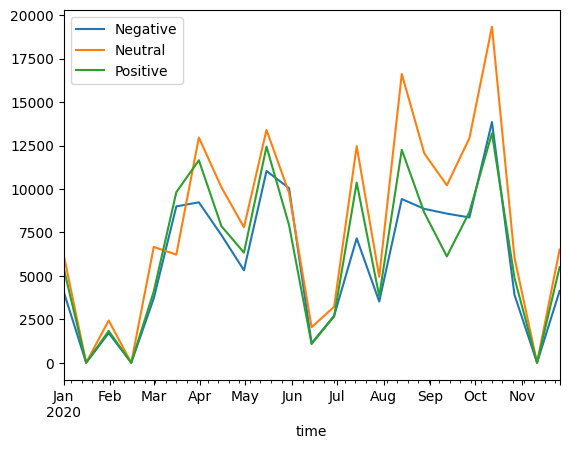

In [30]:
resampled_df.index = pd.to_datetime(resampled_df.index,errors='coerce')
resampled_df.plot()

resampled_df.to_csv('./senti_evlove.csv')